phase 1: clean the data and do exploratory analysis before doing any NLP 

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('all_total.csv')

/Applications/anaconda3/envs/springboard/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,created_utc,id,num_comments,score,selftext,subreddit,title,upvote_ratio,created
0,1662007007,x2ycxd,0,1.0,[removed],domesticviolence,"Women with abusive fathers, How do i get past ...",1.0,1.662032e+09
1,1662002574,x2wyl4,1,1.0,I haven't ordered/eaten our favorite food sinc...,domesticviolence,I can't even eat chocolate without thinking ab...,1.0,1.662028e+09
2,1661996523,x2uv4c,1,1.0,I think this time he's really changing this ti...,domesticviolence,How do I know he's really changing?,1.0,1.662022e+09
3,1661985458,x2qure,0,1.0,[removed],domesticviolence,Representation or no?,1.0,1.662011e+09
4,1661982397,x2pn4w,1,1.0,This is more of a rant than anything because I...,domesticviolence,Just got my 5th NFA 😭,1.0,1.662008e+09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431975 entries, 0 to 431974
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   created_utc   431975 non-null  object 
 1   id            431974 non-null  object 
 2   num_comments  431974 non-null  object 
 3   score         431973 non-null  float64
 4   selftext      395048 non-null  object 
 5   subreddit     431970 non-null  object 
 6   title         431970 non-null  object 
 7   upvote_ratio  412632 non-null  float64
 8   created       431970 non-null  float64
dtypes: float64(3), object(6)
memory usage: 29.7+ MB


In [5]:
#notice there are '[removed]' and many null values in selftext, so we delete those
data_clean = data[~(data.selftext=='[removed]')]
data_clean= data_clean[data_clean['selftext'].notna()]
data_clean

,created_utc,id,num_comments,score,selftext,subreddit,title,upvote_ratio,created
1,1662002574,x2wyl4,1,1.0,I haven't ordered/eaten our favorite food sinc...,domesticviolence,I can't even eat chocolate without thinking ab...,1.0,1.662028e+09
2,1661996523,x2uv4c,1,1.0,I think this time he's really changing this ti...,domesticviolence,How do I know he's really changing?,1.0,1.662022e+09
4,1661982397,x2pn4w,1,1.0,This is more of a rant than anything because I...,domesticviolence,Just got my 5th NFA 😭,1.0,1.662008e+09
5,1661981180,x2p5sn,1,1.0,"Hi, I have been getting abused for 4 years now...",domesticviolence,Can't find the energy to leave,1.0,1.662006e+09
7,1661966939,x2jeo4,1,1.0,I’m thinking about doing couples counseling wi...,domesticviolence,Am I really at a point where I should avoid do...,1.0,1.661992e+09
...,...,...,...,...,...,...,...,...,...
431967,1546441159,abu3o7,13,1.0,What are the main things teachers pay attentio...,GetStudying,Could you help me with essay checking?,NaN,1.546466e+09
431968,1546426341,absdh6,3,1.0,Hi everyone! This is the Accountability Thread...,GetStudying,"Daily Accountability Thread - January 02, 2019",NaN,1.546452e+09
431969,1546360117,abjfcb,16,1.0,My new year's resolution for my academics is t...,GetStudying,How to improve discipline with studying and da...,NaN,1.546385e+09
431972,1546351044,abicqo,23,1.0,"So, I am doing a 2 year technical degree in el...",GetStudying,I can only manage to study the subjects I find...,NaN,1.546376e+09


In [6]:
data_clean.isna().sum()

created_utc        0
id                 0
num_comments       0
score              1
selftext           0
subreddit          3
title              3
upvote_ratio    6491
created            3
dtype: int64

In [7]:
#concatenate each title with its corresponding bodies
data_clean['all_text']= data_clean['title']+" "+ data_clean['selftext']
data_clean.head()

,created_utc,id,num_comments,score,selftext,subreddit,title,upvote_ratio,created,all_text
1,1662002574,x2wyl4,1,1.0,I haven't ordered/eaten our favorite food sinc...,domesticviolence,I can't even eat chocolate without thinking ab...,1.0,1.662028e+09,I can't even eat chocolate without thinking ab...
2,1661996523,x2uv4c,1,1.0,I think this time he's really changing this ti...,domesticviolence,How do I know he's really changing?,1.0,1.662022e+09,How do I know he's really changing? I think th...
4,1661982397,x2pn4w,1,1.0,This is more of a rant than anything because I...,domesticviolence,Just got my 5th NFA 😭,1.0,1.662008e+09,Just got my 5th NFA 😭 This is more of a rant t...
5,1661981180,x2p5sn,1,1.0,"Hi, I have been getting abused for 4 years now...",domesticviolence,Can't find the energy to leave,1.0,1.662006e+09,"Can't find the energy to leave Hi, I have been..."
7,1661966939,x2jeo4,1,1.0,I’m thinking about doing couples counseling wi...,domesticviolence,Am I really at a point where I should avoid do...,1.0,1.661992e+09,Am I really at a point where I should avoid do...


In [8]:
# deal with null value
data_clean.isna().sum()

created_utc        0
id                 0
num_comments       0
score              1
selftext           0
subreddit          3
title              3
upvote_ratio    6491
created            3
all_text           3
dtype: int64

In [9]:
data_clean= data_clean[data_clean['all_text'].notna()]
data_clean.isna().sum()

created_utc        0
id                 0
num_comments       0
score              0
selftext           0
subreddit          0
title              0
upvote_ratio    6488
created            0
all_text           0
dtype: int64

'created_utc' is utc time, 'created' is local time, we care about local time, so we keep 'created' and convert 
it to datetime

In [10]:
data_clean["Datetime"] = pd.to_datetime(data_clean['created'], unit="s")

/Applications/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data_clean.head()

,created_utc,id,num_comments,score,selftext,subreddit,title,upvote_ratio,created,all_text,Datetime
1,1662002574,x2wyl4,1,1.0,I haven't ordered/eaten our favorite food sinc...,domesticviolence,I can't even eat chocolate without thinking ab...,1.0,1.662028e+09,I can't even eat chocolate without thinking ab...,2022-09-01 10:22:54
2,1661996523,x2uv4c,1,1.0,I think this time he's really changing this ti...,domesticviolence,How do I know he's really changing?,1.0,1.662022e+09,How do I know he's really changing? I think th...,2022-09-01 08:42:03
4,1661982397,x2pn4w,1,1.0,This is more of a rant than anything because I...,domesticviolence,Just got my 5th NFA 😭,1.0,1.662008e+09,Just got my 5th NFA 😭 This is more of a rant t...,2022-09-01 04:46:37
5,1661981180,x2p5sn,1,1.0,"Hi, I have been getting abused for 4 years now...",domesticviolence,Can't find the energy to leave,1.0,1.662006e+09,"Can't find the energy to leave Hi, I have been...",2022-09-01 04:26:20
7,1661966939,x2jeo4,1,1.0,I’m thinking about doing couples counseling wi...,domesticviolence,Am I really at a point where I should avoid do...,1.0,1.661992e+09,Am I really at a point where I should avoid do...,2022-09-01 00:28:59


In [12]:
data_clean = data_clean.drop(['created_utc', 'created','selftext', 'title'],axis=1)
data_clean.head()

,id,num_comments,score,subreddit,upvote_ratio,all_text,Datetime
1,x2wyl4,1,1.0,domesticviolence,1.0,I can't even eat chocolate without thinking ab...,2022-09-01 10:22:54
2,x2uv4c,1,1.0,domesticviolence,1.0,How do I know he's really changing? I think th...,2022-09-01 08:42:03
4,x2pn4w,1,1.0,domesticviolence,1.0,Just got my 5th NFA 😭 This is more of a rant t...,2022-09-01 04:46:37
5,x2p5sn,1,1.0,domesticviolence,1.0,"Can't find the energy to leave Hi, I have been...",2022-09-01 04:26:20
7,x2jeo4,1,1.0,domesticviolence,1.0,Am I really at a point where I should avoid do...,2022-09-01 00:28:59


In [13]:
#explore numeric value: num_comments, score, upvote_ratio
print(data_clean.num_comments.value_counts())
print(data_clean.score.value_counts())
print(data_clean.upvote_ratio.value_counts())

0      106360
0       45243
1       41897
1       21015
2        4513
        ...  
458         1
327         1
388         1
279         1
173         1
Name: num_comments, Length: 651, dtype: int64
1.0       239332
2.0         1913
3.0          893
0.0          611
5.0          413
           ...  
239.0          1
2539.0         1
3244.0         1
1311.0         1
214.0          1
Name: score, Length: 200, dtype: int64
1.00    235456
0.99      2096
0.50       372
0.67       132
0.75        94
         ...  
0.53         1
0.52         1
0.61         1
0.59         1
0.42         1
Name: upvote_ratio, Length: 75, dtype: int64


In [14]:
data_clean['num_comments'] = data_clean['num_comments'].astype(float)

[Text(0, 0, 'domesticviolence'),
 Text(1, 0, 'relationship_advice'),
 Text(2, 0, 'relationships'),
 Text(3, 0, 'Fitness'),
 Text(4, 0, 'homegym'),
 Text(5, 0, 'Jokes'),
 Text(6, 0, 'dadjokes'),
 Text(7, 0, 'Meditation'),
 Text(8, 0, 'GetStudying')]

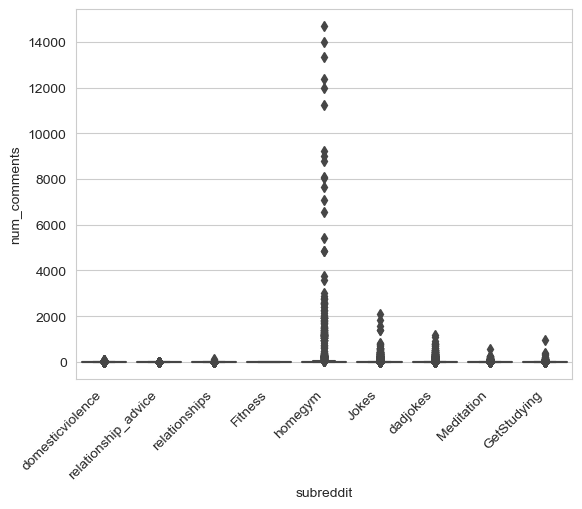

In [15]:
#visualzie 
sns.set_style('whitegrid')
sns.set_palette('husl',3)
chart = sns.boxplot( x= data_clean['subreddit'], y = data_clean['num_comments'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'domesticviolence'),
 Text(1, 0, 'relationship_advice'),
 Text(2, 0, 'relationships'),
 Text(3, 0, 'Fitness'),
 Text(4, 0, 'homegym'),
 Text(5, 0, 'Jokes'),
 Text(6, 0, 'dadjokes'),
 Text(7, 0, 'Meditation'),
 Text(8, 0, 'GetStudying')]

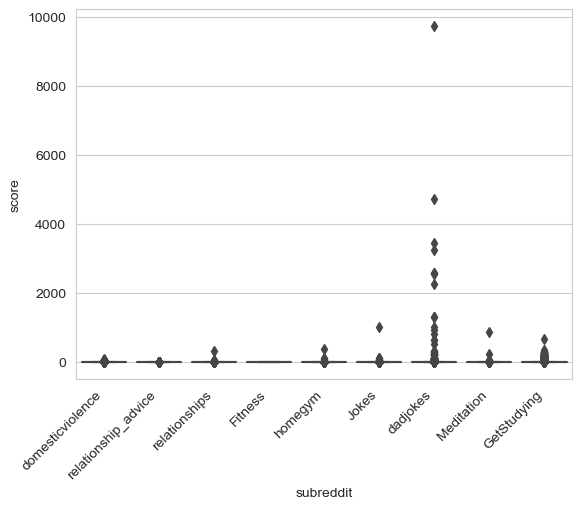

In [16]:
chart= sns.boxplot( x= data_clean['subreddit'], y = data_clean['score'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'domesticviolence'),
 Text(1, 0, 'relationship_advice'),
 Text(2, 0, 'relationships'),
 Text(3, 0, 'Fitness'),
 Text(4, 0, 'homegym'),
 Text(5, 0, 'Jokes'),
 Text(6, 0, 'dadjokes'),
 Text(7, 0, 'Meditation'),
 Text(8, 0, 'GetStudying')]

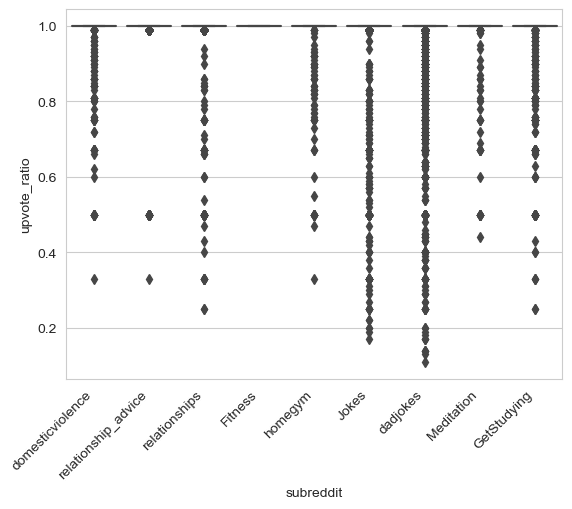

In [17]:
chart= sns.boxplot( x= data_clean['subreddit'], y = data_clean['upvote_ratio'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Don't see any obvious patters between dv and other group, keep them as features for now

In [18]:
data_clean.to_csv('total_clean.csv', index=False)